# Aprendizaje supervisado II: *algoritmos NO paramétricos*

- Cuando hablamos de algoritmos de aprendizaje NO paramétricos nos referimos a aquellos que no presuponen una forma concreta en el modelo a generar
- Resultan mas flexibles y se ajustan mejor a la realidad
- Requieren mas datos para su entrenamiento, son mas lentos y requieren mas memoria
- ##### Ejemplos:
    - Nearest Neighbors
    - Arboles de decisiones

<br/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Nearest Neighbors (NN)

- Puede ser utilizado tanto para la **clasificacion** como para la **regresion** de datos utilizando logicas muy similares
- Se basa en encontrar un numero predefinido de *ejemplos* de entrenamiento más cercanos al nuevo punto (de prueba) y predecir a este ultimo a través de estos
- Es un metodo de aprendizaje automatico "NO generalizado" ya que, simplemente, *recuerda* todos sus datos de entrenamiento y los utiliza para predecir los nuevos
- Es un algoritmo "perezoso", es decir, no utiliza los datos de entrenamiento sino hasta la fase de prueba. Ya que no "genera" ninguna generalizacion
- Sufre de **"la maldicion de la dimensionalidad"**
    - A medida que se aumenta la dimension de los datos, los datos de entrenamiento aumentarán exponencialmente si se quiere obtener un "buen" ajuste
    - **Dimensiones:** caracteristicas (o features) de los datos que se quieren utilizar para clasificarlos

#### Ejemplo: Clasificacion KNN

In [2]:
from sklearn.neighbors import KNeighborsClassifier

`KNeighborsClassifier` es una implementacion de "Nearest Neighbors" que utiliza los `K` puntos mas cercanos al punto de prueba para clasificarlo.
- Un K alto disminuye el efecto de los puntos aislados (o ruido) en la decisión y hace que los limites de clasificacion sean mas definidos
- Por otro lado un K alto trae consigo un mayor coste computacional

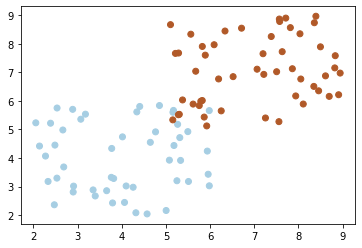

In [3]:
data = pd.read_csv("examples/clasificacion.csv")
plt.scatter(data.x, data.y, c=data.classification.values, cmap=plt.cm.Paired)
plt.show()

Sabiendo que la primera mitad de los puntos petenecen a una categoria y los demas a otra, dividimos los datos un un conjunto de entrenamiento y otro de prueba:

In [4]:
training_percentage = 0.8  # Vamos a usar el 80% de cada clase para entrenar el algoritmo
training_sample_amount = int(training_percentage * len(data))

training_data = data.sample(n=training_sample_amount)
training_data_classifications = training_data.classification.values

# Obtenemos el conjunto de prueba a partir de los datos que no estan contenidos en en conjunto de entrenamiento
test_data = data.merge(training_data, how="left", indicator=True).query('_merge == "left_only"')

print(f"Training data samples: {len(training_data)}, Test data samples: {len(test_data)}")

Training data samples: 80, Test data samples: 20


Luego cargamos el modelo con los datos de entrenamiento:

In [5]:
K = 15

classifier = KNeighborsClassifier(K)
classifier.fit(training_data[["x", "y"]], training_data_classifications)  # Importante no olvidarse de indicar las columnas que se desean utilizar para la clasificacion

KNeighborsClassifier(n_neighbors=15)

- Utilizamos K = 15

Utilizamos el modelo para clasificar los datos de prueba:

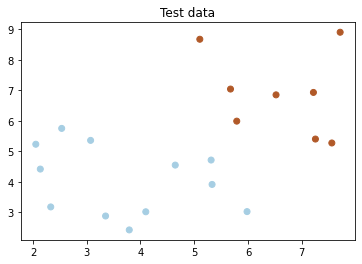

In [6]:
predictions = classifier.predict(test_data[["x", "y"]])

plt.title("Test data")
plt.scatter(test_data.x, test_data.y, c=predictions, cmap=plt.cm.Paired)
plt.show()

Finalmente podemos visualizar cómo clasifica nuestro modelo los puntos del plano XY:

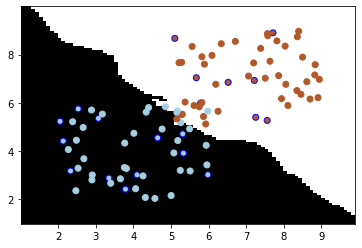

In [7]:
def show_classification_grid(classifier, data, training_data, test_data):
    # Obtenemos los valores minimos y maximos de cada eje para definir las dimensiones de la grilla

    x_min = min(data.x) - 1
    x_max = max(data.x) + 1

    y_min = min(data.y) - 1
    y_max = max(data.y) + 1


    # Definimos los centros de la grilla

    step_size = 0.1  # Tomamos un "step" un poco mas grande que para los ejemplos anteriores, ya que este algoritmo requiere mas tiempo para procesar cada punto
    cols = np.arange(x_min, x_max, step_size)
    rows = np.arange(y_min, y_max, step_size)
    c_xs, c_ys = np.meshgrid(cols, rows)
    centers = np.c_[c_xs.ravel(), c_ys.ravel()]

    center_predictions = classifier.predict(centers)

    plt.pcolormesh(c_xs, c_ys, center_predictions.reshape(c_xs.shape), cmap=plt.cm.gray, shading="auto")

    
    # Imprimimos los datos por encima de nuestra grilla

    plt.scatter(test_data.x, test_data.y, c=classifier.predict(test_data[["x", "y"]]), cmap=plt.cm.Paired, edgecolors="blue")  # Bordeamos de color azul los puntos que se utilizar como pruebas
    plt.scatter(training_data.x, training_data.y, c=training_data_classifications, cmap=plt.cm.Paired)

    plt.show()

show_classification_grid(classifier, data, training_data, test_data)

- Se observa que el clasificador no tiene una forma regular como si ocurria con el clasificador lineal antes visto

##### weight:

Un parametro muy util que podemos utilizar con `KNeighborsClassifier` es `weight`, que indica como será ponderado el peso de los puntos vecinos al punto en cuestion.

- Por defecto su valor es "uniform", y esto provoca que todos los vecinos tengan el mismo peso en la votacion a la hora de clasificar el punto
- Otro valor que podemos usar es "distance", que hace que cuanto mas cercano sea el vecino mayor será su influencia en la clasificación

Este parametro se ve de la siguiente manera en nuestro ejemplo:

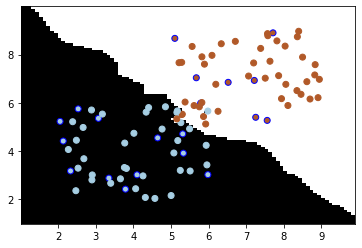

In [8]:
K = 15

classifier = KNeighborsClassifier(K, weights="distance")
classifier.fit(training_data[["x", "y"]], training_data_classifications)

show_classification_grid(classifier, data, training_data, test_data)

- En este caso, no es mucha la diferencia

<br/>

## Árboles de decisiones

- Son sencillos de entender e interpretar
- Se pueden visualizar

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz as gv

Vamos a utilizar los mismos datos que en el ejemplo anterior:

In [10]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(training_data[["x", "y"]], training_data_classifications)

classifier.score(training_data[["x", "y"]], training_data_classifications)

0.975

Probamos el arbol con los datos de prueba:

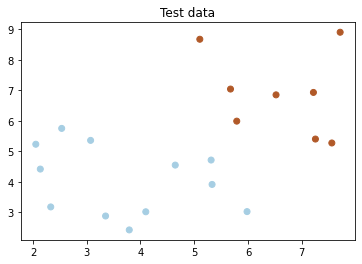

In [11]:
predictions = classifier.predict(test_data[["x", "y"]])

plt.title("Test data")
plt.scatter(test_data.x, test_data.y, c=predictions, cmap=plt.cm.Paired)
plt.show()

Ahora podemos visualizar como el modelo clasifica los puntos del plano:

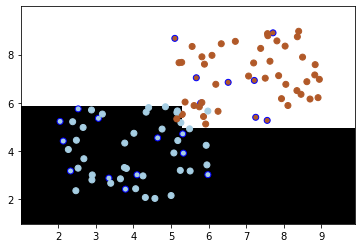

In [12]:
show_classification_grid(classifier, data, training_data, test_data)

👀

Tambien podemos visualizar el arbol utilizando `graphviz`:

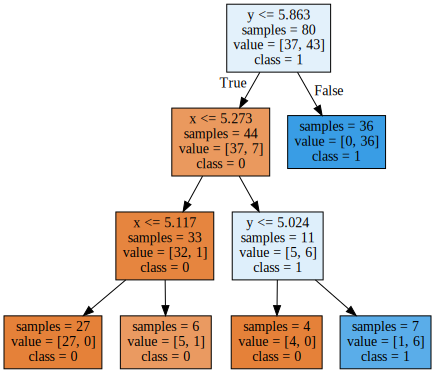

In [13]:
# Guardamos el arbol en un archivo
export_graphviz(classifier, out_file="examples/arbol.dot", class_names=["0", "1"], feature_names=["x", "y"], impurity=False, filled=True)

# Usamos el archivo para graficar el arbol usando `Source`
with open("examples/arbol.dot") as tree_file:
    tree_data=tree_file.read()
    
gv.Source(tree_data)

Tambien podemos analizar la importancia que le asigna el arbol a cada una de nuestras caracteristicas utilizando un grafico de barras:

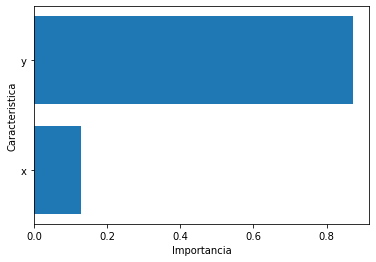

In [14]:
plt.barh(range(2), classifier.feature_importances_)  # 2 features
plt.yticks(range(2), ["x", "y"])
plt.xlabel("Importancia")
plt.ylabel("Caracteristica")
plt.show()

- La importancia representa la utilidad de cierta caracteristica para la toma de decisiones del algoritmo